Malaika Paddison (i6285500)

Milda Mikalauskaite (i6321260)

#Python course: final project#




##Introduction##

We were interested in exploring how **Life expectancy** is correlated with two indicators of health spendings: **Percentage expenditure** and **Income composition of resources**.

The variables boldened will be refered to simply as "variables" in the following project.

Our RQ: Which indicator is the best at predicting life expectancy: percentage expenditure or income composition of resources?

We thus separated this main RQ into simple comparisons of life expectancy with each variable.

To further investigate this problem, we decided to split the list of countries into four continent: Asia, Europe, Africa, and America. Individual country analysis is also performed.

##Importing the file##

In [ ]:
import pandas as pd
import numpy as np
CHF = pd.read_csv("https://raw.githubusercontent.com/NHameleers/dtz2025-datasets/master/CountryHealthFactors.csv")
CHF= CHF.rename(columns=str.strip)

##Selection of appropriate dataframe & Data cleaning##
####Milda####

We used the following columns:
- Country
- Year (all years were selected)
- Life expectancy
- percentage expenditure
- Income composition of resources

We excluded countries with:
- more than 5 missing values in the chosen variables throughout the years
- more than 5 values equal to 0.0 in the chosen variables throughout the years

This excluded 42 countries from the initial 193 countries, leaving us with 151 countries fit for analysis.
We checked whether there were no typos or countries appearing multiple times with different spelling using the code below, but have decided to not include the output here as it does not serve any relevant purpose. No typos were noticed, and each country appeared only under one spelling in the dataset.

```
dfCHF['Country'].unique()
```



The final dataframe (dfCHF) had 2266 rows and 6 columns. No outliers were found in our chosen dataframe, which we assessed by looking at maximum and minimum values.

In [ ]:
dfnew = CHF.loc[:, ['Country', 'Year', 'Life expectancy', 'percentage expenditure', 'Income composition of resources']]

In [ ]:
exclude_countries = []
rows_with_missing_values = dfnew[dfnew.isnull().any(axis=1)]
missing_counts_per_country = rows_with_missing_values['Country'].value_counts()
threshold = 5
exclude_countries = [country for country, count in missing_counts_per_country.items() if count > threshold]
columns_to_check = ['Life expectancy', 'percentage expenditure', 'Income composition of resources']

mask = (dfnew[columns_to_check] == 0.0).any(axis=1)
rows_with_zeros = dfnew[mask]
zero_counts_per_country = rows_with_zeros['Country'].value_counts()
for country, count in zero_counts_per_country.items():
  if count > 5:
    exclude_countries.append(country)

In [ ]:
excluded_countries = dfnew[dfnew.Country.isin(exclude_countries)]
filtered_df = dfnew[~dfnew['Country'].isin(exclude_countries)]
dfCHF = filtered_df.loc[:, ['Country', 'Year', 'Life expectancy', 'percentage expenditure', 'Income composition of resources']]

In [ ]:
uniqueCHF = dfCHF['Country'].unique()

In order to compare between continents, we created four groups corresponding to:
- Europe
- America
- Africa
- Asia

We use ChatGPT to categorise our 151 countries into the four chosen continents, and verified its output to make sure no mistakes were made.

In [ ]:
Europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']
America = ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']
Asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
Africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

In [ ]:
dfCHF.loc[dfCHF["Country"].isin(Europe), 'Continent'] = 'Europe'
dfCHF.loc[dfCHF["Country"].isin(America), 'Continent'] = 'America'
dfCHF.loc[dfCHF["Country"].isin(Africa), 'Continent'] = 'Africa'
dfCHF.loc[dfCHF["Country"].isin(Asia), 'Continent'] = 'Asia'

##Data Exploration##
####Malaika####


In [ ]:
dfCHF.describe()

,Year,Life expectancy,percentage expenditure,Income composition of resources
count,2266.000000,2256.000000,2266.000000,2259.000000
mean,2007.524272,69.784264,933.880958,0.661276
std,4.615033,9.655400,2222.100224,0.176179
min,2000.000000,36.300000,0.000000,0.000000
25%,2004.000000,63.800000,25.225227,0.522000
50%,2008.000000,72.600000,134.261309,0.697000
75%,2012.000000,76.300000,604.092802,0.796500
max,2015.000000,89.000000,19479.911610,0.948000


From this basic description we can see that:
- the mean life expectancy is 69.8 years old, with a range of 36.3 to 89.0 years old
- the percentage expenditure averages at 933.8%, with a median of 134.3%, althought it reaches extraordinary numbers such as 19 480%
- the income composition of resources avergaes at 0.66, going up to 0.94

In [ ]:
dfCHF.groupby('Continent').mean(numeric_only=True)

,Year,Life expectancy,percentage expenditure,Income composition of resources
Continent,,,,
Africa,2007.500000,59.266719,135.844751,0.484586
America,2007.528497,73.586198,579.708913,0.699459
Asia,2007.500000,71.386742,570.355951,0.676267
Europe,2007.520755,78.161932,2501.928668,0.826375


When grouping by continent:
- the average life expectancy is highest in Europe (78), then in America (74), closely followed by Asia (73), and finally Africa (59)
- this can also be observed in the percentage expenditure, with Europe having a excpetionally high value of 2502%, whereas America and Asia are around 575%; Africa having a relatively low value of 136%
- again, the same order of continents can be obsrved when comparing income composition of resources

From this quick overview, we can conlcude that there is some correlation between these three indicators. However, closer analysis must be performed to better understand these relationships.

In [ ]:
dfCHF.groupby('Continent').median(numeric_only=True)

,Year,Life expectancy,percentage expenditure,Income composition of resources
Continent,,,,
Africa,2007.5,58.15,44.049715,0.4660
America,2008.0,74.10,245.439816,0.7055
Asia,2007.5,72.70,77.727568,0.6925
Europe,2008.0,78.50,748.024692,0.8440


If we now look at median values instead of mean values:
- life expectancy and income compostion of resources has not chnaged much
- percentage expenditure has seen signifanct shifts: this means that there are extreme values in the dataset that severely impact the mean.
- for example, Asia's median percentage expenditure is 77%, whereas its mean was 570, indicating that although half of asian countries are below this 77%, a few countries have very high values that bring the mean up to 570.

Comparing median values thus provides more nuance into the exploration than only comparing means. With this preliminary knowledge, we went further into data analysis.

##Data visualisation##

To better visualise the data, we mostly plotted scatterplots of individual countries and also of a whole continent, having Life expectancy as the depedant variable and percentage expenditure or income composition of resources as independant variables

###Life expectancy vs. percentage expenditure###
####Milda####

In [ ]:
import altair as alt
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import fixed
import matplotlib.pyplot as plt

In [ ]:
def select_country(Country, dfCHF):
  return dfCHF.loc[dfCHF['Country'] == Country]

def visualize_country_info(Country, dfCHF):
  country_data = select_country(Country, dfCHF)
  graph = alt.Chart(country_data).mark_point().encode(
      x = "percentage expenditure",
      y=alt.Y('Life expectancy:Q', scale=alt.Scale(domain=[30, 99])),
      tooltip = "Country")
  regression_line = graph.transform_regression(
        'percentage expenditure', 'Life expectancy'
    ).mark_line(color='red').properties(
        title=f'Life Expectancy vs. Percentage Expenditure for {Country}'
    )

  combined_plot = (graph + regression_line).properties(
        title=f'Life Expectancy vs. Percentage Expenditure for {Country}'
    )

  return combined_plot

In [ ]:
scatter_plots= []

def select_continent(Continent, dfCHF):
    return dfCHF.loc[dfCHF['Continent'] == Continent]

def visualise_continent_info(Continent, dfCHF):
    continent_data = select_continent(Continent, dfCHF)

    scatter_plot = alt.Chart(continent_data).mark_point().encode(
        x='percentage expenditure:Q',
        y=alt.Y('Life expectancy:Q', scale=alt.Scale(domain=[30, 99])),
        tooltip='Country:N',
        color='Country'
    )

    regression_line = scatter_plot.transform_regression(
        'percentage expenditure', 'Life expectancy'
    ).mark_line(color='red')
    title=f'Life Expectancy vs. Percentage Expenditure for {Continent}'

    scatter_plot = (scatter_plot + regression_line).properties(
        title=f'Life Expectancy vs. Percentage Expenditure for {Continent}'
    )

    return scatter_plot + regression_line

In [ ]:
interact(visualize_country_info, Country = uniqueCHF, dfCHF=fixed(dfCHF))

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

<function __main__.visualize_country_info(Country, dfCHF)>

In [ ]:
interact(visualise_continent_info, Continent = ['Africa', 'Europe', 'America', 'Asia'], dfCHF=fixed(dfCHF))

interactive(children=(Dropdown(description='Continent', options=('Africa', 'Europe', 'America', 'Asia'), value…

<function __main__.visualise_continent_info(Continent, dfCHF)>

Continent analysis always shows a certain positive relationship between the 2 variables, with moderately steep trendlines. When looking at European data, the trend is way weaker than that of Africa, where relatively smaller increases in percentage expenditure is associated with higher life expectancy.

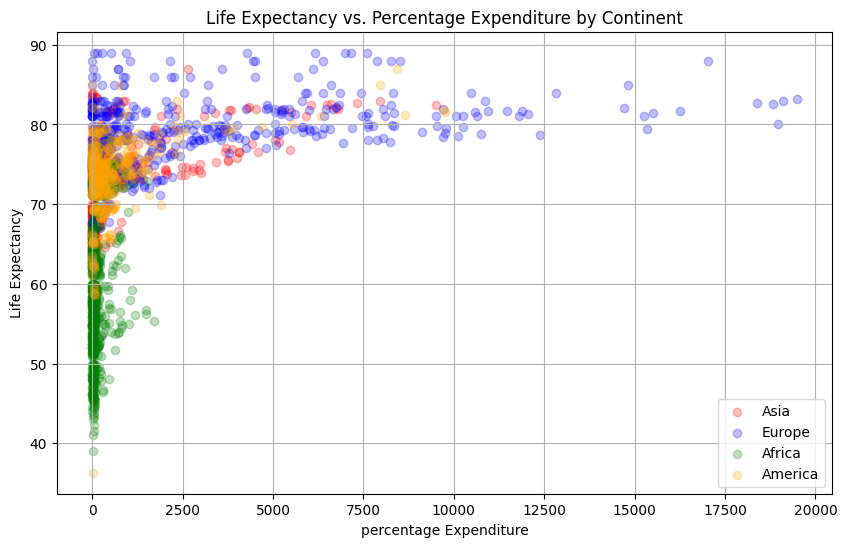

In [ ]:
continent_colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'America': 'orange'
}

plt.figure(figsize=(10, 6))
for continent, color in continent_colors.items():
    continent_data = dfCHF[dfCHF['Continent'] == continent]
    plt.scatter(continent_data['percentage expenditure'], continent_data['Life expectancy'], label=continent, color=color, alpha= 0.25)

plt.xlabel('percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Percentage Expenditure by Continent')
plt.legend()

plt.grid(True)
plt.show()

###Life expectancy vs. Income composition of resources###
####Malaika####

In [ ]:
def select_country_ICR(Country, dfCHF):
  return dfCHF.loc[dfCHF['Country'] == Country]

def visualize_country_info_ICR(Country, dfCHF):
  country_data = select_country(Country, dfCHF)
  graph = alt.Chart(country_data).mark_point().encode(
      x = "Income composition of resources",
      y=alt.Y('Life expectancy:Q', scale=alt.Scale(domain=[30, 99])),
      tooltip = "Country"
      )
  regression_line = graph.transform_regression(
        'Income composition of resources', 'Life expectancy'
    ).mark_line(color='red').properties(
        title=f'Life Expectancy vs. Income composition of resources for {Country}'
    )

  combined_plot = (graph + regression_line).properties(
        title=f'Life Expectancy vs. Income composition of resources for {Country}'
    )

  return combined_plot

In [ ]:
scatter_plots= []

def select_continent_ICR(Continent, dfCHF):
    return dfCHF.loc[dfCHF['Continent'] == Continent]

def visualise_continent_info_ICR(Continent, dfCHF):
    continent_data = select_continent(Continent, dfCHF)

    scatter_plot = alt.Chart(continent_data).mark_point().encode(
        x='Income composition of resources:Q',
        y=alt.Y('Life expectancy:Q', scale=alt.Scale(domain=[30, 99])),
        tooltip='Country:N',
        color='Country'
    )
    regression_line = scatter_plot.transform_regression(
        'Income composition of resources', 'Life expectancy'
    ).mark_line(color='red')
    title=f'Life Expectancy vs. Income composition of resources for {Continent}'

    scatter_plot = (scatter_plot + regression_line).properties(
        title=f'Life Expectancy vs. Income composition of resources for {Continent}'
    )

    return scatter_plot + regression_line

In [ ]:
interact(visualize_country_info_ICR, Country = uniqueCHF, dfCHF=fixed(dfCHF))

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'Angola', …

<function __main__.visualize_country_info_ICR(Country, dfCHF)>

In [ ]:
interact(visualise_continent_info_ICR, Continent = ['Africa', 'Europe', 'America', 'Asia'], dfCHF=fixed(dfCHF))

interactive(children=(Dropdown(description='Continent', options=('Africa', 'Europe', 'America', 'Asia'), value…

<function __main__.visualise_continent_info_ICR(Continent, dfCHF)>

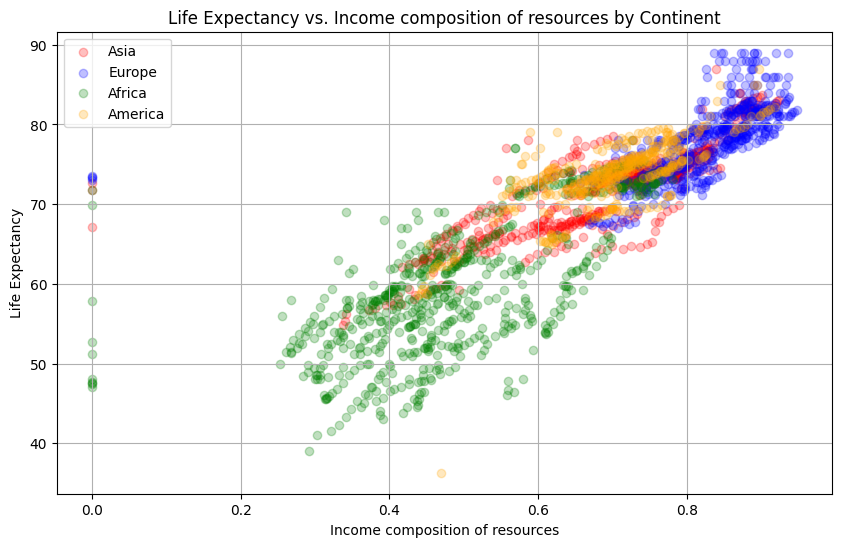

In [ ]:
continent_colors = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'America': 'orange'
}

plt.figure(figsize=(10, 6))
for continent, color in continent_colors.items():
    continent_data = dfCHF[dfCHF['Continent'] == continent]
    plt.scatter(continent_data['Income composition of resources'], continent_data['Life expectancy'], label=continent, color=color, alpha= 0.25)

plt.xlabel('Income composition of resources')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Income composition of resources by Continent')
plt.legend()

plt.grid(True)
plt.show()

##Conclusions##

We plotted life expectancy against percentage expenditure and income composition of resources to see which of the two could be better predictors of life expectancy.

Percentage expenditure showed relatively weak positive correlation with life expectancy, especially on a country-perspective. Continents with lower life expectancy had a stornger relationship between the two variables.

Income composition of resources showed a stronger positive relationship with life expectancy, with the slope being very similar between continents, although with varying intercepts.

Although this is an extremely preliminary analysis, income composition of resources seems to have a stronger relationship with life expectancy and, out of the two chosen variables, we consider it to be the better predictor of the two.